In [1]:
import os
import pydicom
import numpy as np
from detect_points1 import detect_spheres_from_dicom

[Taichi] version 1.7.3, llvm 15.0.1, commit 5ec301be, win, python 3.8.10
[Taichi] Starting on arch=x64


In [2]:

dicom_path = "C:/Users/YangLiangZhu/Desktop/泰州CT模型/0605脊柱实验数据/dicom_data_bad_01"
dicom_files = []
for root, dirs, files in os.walk(dicom_path):
    for file in files:
        if file.endswith('.dcm'):
            dicom_files.append(os.path.join(root, file))
dicom_files.sort()
slices = list()
for f in dicom_files:
    try:
        ds = pydicom.dcmread(f, force=True)
        if hasattr(ds, 'pixel_array'):  # 确保文件包含像素数据
            slices.append(ds)
        else:
            print(f"⚠️ 无像素数据: {f}")
            # print(ds.pixel_array.shape)
    except Exception as e:
        print(f"❌ 读取失败: {f}, 错误: {e}")
slices.sort(key=lambda x: float(x.ImagePositionPatient[2]))
data = np.stack([s.pixel_array for s in slices])

pixel_spacing = slices[0].PixelSpacing  # x,y轴间隔
if hasattr(slices[0], 'SpacingBetweenSlices'):  # Z轴间隔
    thickness = slices[0].SpacingBetweenSlices
else:
    thickness = abs(slices[1].ImagePositionPatient[2] - slices[0].ImagePositionPatient[2])
pos_ori = slices[-1].ImagePositionPatient

spheres, p_bounds, z_bon, y_bon, x_bon = detect_spheres_from_dicom(data=data, pixel_spacing=pixel_spacing, thickness=thickness, pos_ori=pos_ori, num_spheres=10)
# for key, value in p_bounds.items():
#     print(key)
#     print(value)


[172, 181, 193, 200, 204, 212, 225, 231, 236, 240, 245, 253, 270, 271, 280, 287, 319, 335, 346, 381, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
得票数=71.0
圆心 (287.0, 141.0, 304.0) 的边界点：146
得票数=69.0
圆心 (319.0, 149.0, 253.0) 的边界点：148
得票数=52.0
圆心 (346.0, 158.0, 253.0) 的边界点：134
得票数=46.0
圆心 (172.0, 500.0, 84.0) 的边界点：119
得票数=43.0
圆心 (280.0, 472.0, 65.0) 的边界点：134
得票数=42.0
圆心 (212.0, 492.0, 73.0) 的边界点：104
得票数=42.0
圆心 (212.0, 500.0, 73.0) 的边界点：90
得票数=41.0
圆心 (280.0, 136.0, 266.0) 的边界点：120
得票数=39.0
圆心 (231.0, 500.0, 73.0) 的边界点：100
得票数=35.0
圆心 (270.0, 452.0, 58.0) 的边界点：79


120 280.0 136.0 266.0


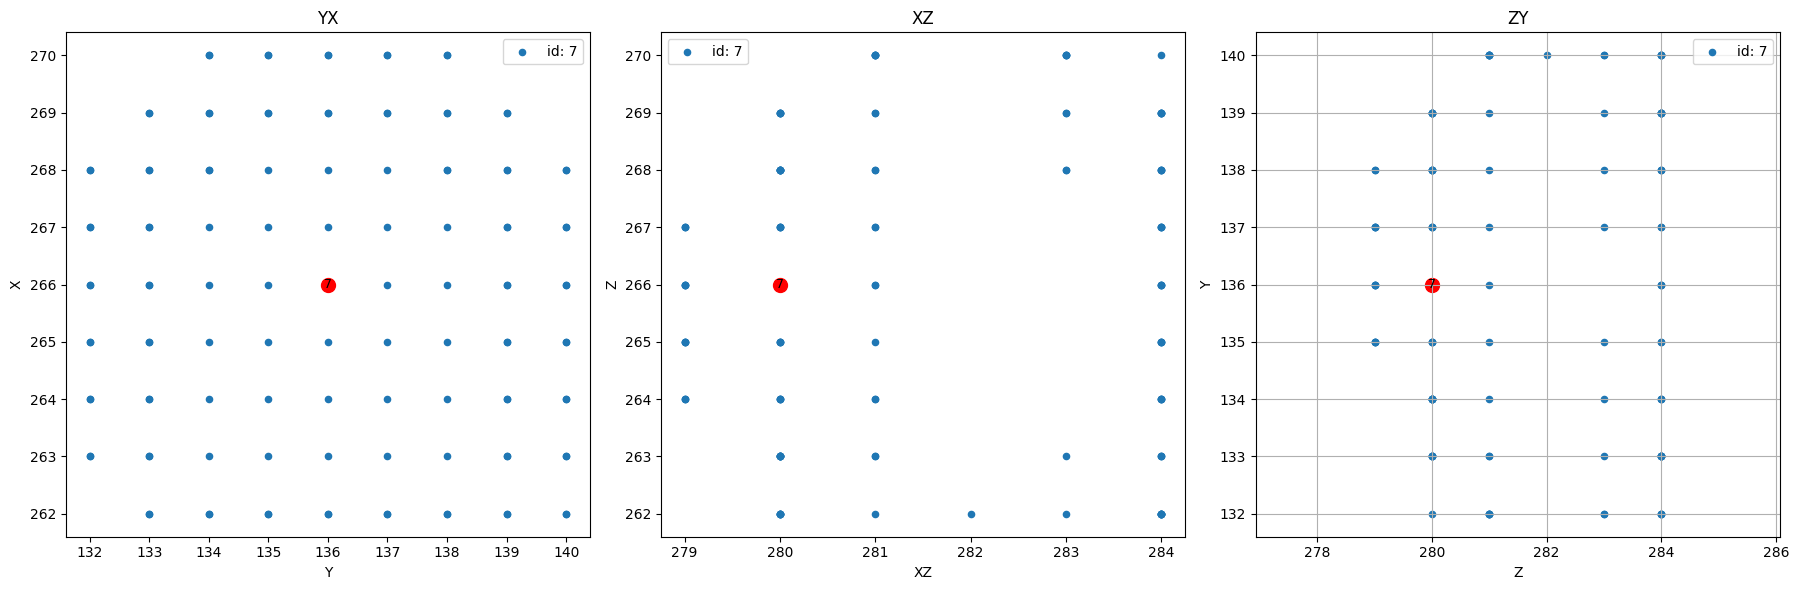

In [8]:

import matplotlib.pyplot as plt
import numpy as np


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # 1行2列子图

for idx, ((cx, cy, cz), boundary_points) in enumerate(p_bounds.items()):
    if not boundary_points:
        continue
    if idx != 7:
        continue
    
    bp = np.array(boundary_points)
    print(len(bp), cx, cy, cz)

    # ✅ 确认这是正确的 XY 顺序！（有可能你需要换成 bp[:, 2], bp[:, 1] 视情况）
    x = bp[:, 0]
    y = bp[:, 1]
    z = bp[:, 2]

    ax1.scatter(y, z, s=20, alpha=1, label=f'id: {idx}')
    # 圆心也标出来
    ax1.scatter(cy, cz, color='red', s=100, marker='o')
    ax1.text(cy, cz, f'{idx}', fontsize=9, ha='center', va='center')
    
    
    ax2.scatter(x, z, s=20, alpha=1, label=f'id: {idx}')
    # 圆心也标出来
    ax2.scatter(cx, cz, color='red', s=100, marker='o')
    ax2.text(cx, cz, f'{idx}', fontsize=9, ha='center', va='center')
    
    ax3.scatter(x, y, s=20, alpha=1, label=f'id: {idx}')
    # 圆心也标出来
    ax3.scatter(cx, cy, color='red', s=100, marker='o')
    ax3.text(cx, cy, f'{idx}', fontsize=9, ha='center', va='center')

ax1.set_title("YX")
ax1.set_xlabel("Y")
ax1.set_ylabel("X")
ax1.legend()
ax2.set_title("XZ")
ax2.set_xlabel("XZ")
ax2.set_ylabel("Z")
ax2.legend()
ax3.set_title("ZY")
ax3.set_xlabel("Z")
ax3.set_ylabel("Y")
ax3.legend()
plt.axis('equal')
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
def count_points_in_space(center, boundary_points):
    cx, cy, cz = center
    bp = np.array(boundary_points)
    counts = [0] * 8
    for x, y, z in bp:
        region = 0
        if x > cx: region += 1
        if y > cy: region += 2
        if z > cz: region += 4
        counts[region] += 1
    return counts

In [5]:
for center, bounds in p_bounds.items():
    counts = count_points_in_space(center=center, boundary_points=bounds)
    print(counts)

[26, 24, 18, 16, 19, 19, 13, 11]
[25, 25, 19, 19, 18, 18, 12, 12]
[17, 17, 15, 13, 21, 19, 17, 15]
[23, 21, 11, 22, 17, 7, 12, 6]
[27, 23, 18, 16, 13, 9, 14, 14]
[13, 16, 0, 21, 9, 17, 12, 16]
[5, 29, 4, 4, 5, 20, 7, 16]
[20, 16, 15, 17, 11, 18, 8, 15]
[6, 22, 2, 17, 9, 21, 10, 13]
[24, 24, 2, 19, 0, 3, 0, 7]


180 99


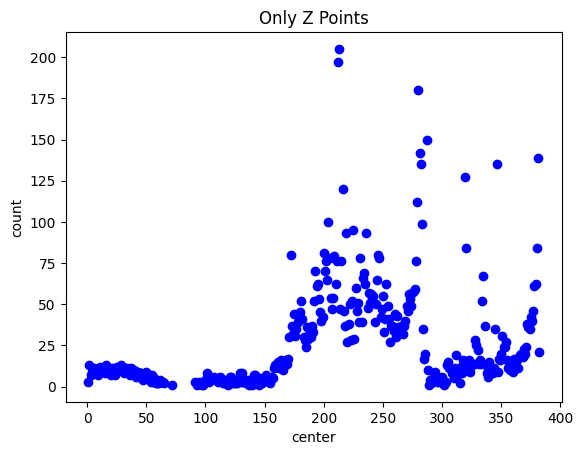

In [6]:
import matplotlib.pyplot as plt
import numpy as np

bonz_list = list(z_bon)
bonz_list = [i for i in bonz_list if i != 0]  # 极值投票的时候被投掉了

bonx_list = list(x_bon)
bonx_list = [i for i in bonx_list if i != 0]

bony_list = list(y_bon)
bony_list = [i for i in bony_list if i != 0]

last_num = 0
count = 0
count1 = 1
zp_dict = dict()
for i in bonz_list:
    if last_num == 0:
        last_num = i
    else:
        zp = (np.ceil((i + last_num) / 2))
        if zp in zp_dict.keys():
            zp_dict[zp] += 1
        else:
            zp_dict[zp] = 1
        last_num = i
#         if zp == 283:
#             count += 1
#         elif zp == 280:
#             count1 += 1
# print(f"283 count={count}")   # 正确圆心
# print(f"280 count={count1}")  # 错误圆心
# for key, count in zp_dict.items():
#     print(key, count)
print(zp_dict[280], zp_dict[283])
center = list(zp_dict.keys())
count = list(zp_dict.values())

plt.scatter(center, count, color="blue", marker="o")
# plt.yticks([])  # 隐藏 Y 轴刻度
plt.title("Only Z Points")
plt.xlabel("center")
plt.ylabel("count")
plt.show()



In [13]:
import nrrd

# 把投票的所有边界点都在3D slicer画出来看一下
bound_mask = np.zeros_like(data)
for idx, ((cx, cy, cz), boundary_points) in enumerate(p_bounds.items()):
    if (cx, cy, cz) == (280.0, 136.0, 266.0):
        for point in boundary_points:
            x, y, z = point
            bound_mask[z, y, x] = 4000

header = {
    "space": "LPS",
    "space directions": np.array(
        [[-1, 0, 0], [0, 1, 0], [0, 0, -1]]),
    "sizes": np.array([data.shape[2], data.shape[1], data.shape[0]]),
    "space origin": np.array(slices[-1].ImagePositionPatient)
}
nrrd.write('boundary_points.nrrd', bound_mask, header)
print("保存nrrd成功")

保存nrrd成功
